In [1]:
import importlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
plt.style.use('dark_background')

In [22]:
colors = ["#59ffc5", "#ffed4f", "#19ffaf", "#00eaff", "#ffed4f", "#f67dff", "#ff59db", "#ff59db", "#fffba6", "cyan"]

In [3]:
import neona
importlib.reload(neona)

<module 'neona' from 'C:\\Users\\GIGABYTE\\Desktop\\3 Month Course\\PRACTICE\\Neona-project\\neona.py'>

# 

# BAR

In [328]:
def plot_configure(ax, spines_yn= True, figsize= None):
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(spines_yn)

In [95]:
def get_point(fig, point_size):
    fig_width_x_height = fig.get_figwidth() * fig.get_figheight()
    
    point_size *= 1_000
    patch_size = (point_size * fig_width_x_height) // 150
    decrease = (500 * patch_size) // 10_000
    point = (50 * patch_size) // 10_000

    size = np.arange(patch_size, 0, -decrease); gap = len(size)
    alpha = np.linspace(.05, .5, gap) ** 3
    return size, alpha, point

In [190]:
np.arange(10, -1, -4)

array([10,  6,  2])

In [275]:
def get_lw(lw=15):
    # a = width and b = alpha
    a = np.arange(lw, 0, -4); gap = len(a)
    b = np.linspace(0, .3, gap)
    return a, b

In [276]:
def barplot(x, y, spines= True, figsize= None, point_size= 2, color= "#59ffc5", point_marker= 'o', font_dict= dict(), font_offset_xy= (0, 0), show_values= True):
    fig, ax = plot_configure(spines_yn= spines, figsize= figsize)
    sizes, alphas, point = get_point(fig, point_size)
    a, b = get_lw()
    
    for xi, yi in zip(x, y):
        for width, alpha in zip(a, b):
            ax.plot([xi, xi], [0, yi], lw= width, alpha= alpha, color= color)
        ax.plot([xi, xi], [0, yi], lw= 1, alpha= 1, color= color)
        
        for size, alpha in zip(sizes, alphas):
            ax.scatter(xi, yi, s= size, alpha= alpha, color= color, marker= point_marker)
        ax.scatter(xi, yi, s= point, alpha= 1, color= color, marker= point_marker)
        
    if show_values:
        x = plt.xticks()[0]
        for xi, yi in zip(x, y):
       
    ox, oy = font_offset_xy
            ax.text(xi + ox, yi + oy, str(yi), **font_dict)
            
    return ax

# 

# LINE

In [24]:
import neona
importlib.reload(neona)

<module 'neona' from 'F:\\neona\\neona.py'>

In [9]:
df = pd.DataFrame(np.random.randint(0, 100, (20,2)), index= pd.date_range('25/4/2021', periods= 20))

In [10]:
df.head()

,0,1
2021-04-25,2,69
2021-04-26,15,17
2021-04-27,62,77
2021-04-28,15,89
2021-04-29,41,4


In [11]:
def lineplot(x, y= None, spines= True, figsize= None, point_size= 2,
             color= "#59ffc5", point_marker= 'o', font_dict= dict(),
             font_offset_xy= (0, 0), show_values= True, show_marks= True):
    
    fig, ax = plot_configure(spines_yn= spines, figsize= figsize)
    sizes, alphas, point = get_point(fig, point_size= point_size)
    font_dict['color'] = color
    a, b = get_lw()
    
            
    # WHOLE DF / Series (goes only if X is provided and is either DF or Series)
    if not isinstance(y, (pd.Series, pd.DataFrame)) and y == None:
        
        # DF given
        if isinstance(x, pd.DataFrame):
            columns = [*x.columns]
            for colorId, col in enumerate(columns):
                font_dict['color'] = colors[colorId]
                
                for width, alpha in zip(a, b):
                    plt.plot(x[col], lw= width, alpha= alpha, color= colors[colorId])
                plt.plot(x[col], lw= 1, alpha= 1, color= colors[colorId])
                
                if show_values: 
                    for ind, val in zip(x[col].index, x[col].values):
                        plt.text(ind, val, str(val), **font_dict)    
                        
                if show_marks:
                    for ind, val in zip(x[col].index, x[col].values):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= colors[colorId], marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= colors[colorId], marker= point_marker)
                    
        # SERIES given / List
        else:
            for width, alpha in zip(a, b):
                plt.plot(x, lw= width, alpha= alpha, color= color)
            plt.plot(x, lw= 1, alpha= 1, color= color)
            
            if show_values:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        plt.text(ind, val, str(val), **font_dict)    
            
            if show_marks:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    # Both X and Y given              
    else:
        for width, alpha in zip(a, b):
            plt.plot(x, y, lw= width, alpha= alpha, color= color)
        plt.plot(x, y, lw= 1, alpha= 1, color= color)
        
        if show_values:
            for valx, valy in zip(x, y):
                plt.text(valx, valy, str(valy), **font_dict)   
            
        if show_marks:
            for ind, val in zip(x, y):
                for size, alpha in zip(sizes, alphas):
                    plt.scatter(ind, val, s= size, alpha= alpha, color= color, marker= point_marker)
                plt.scatter(ind, val, s= 10, alpha= 1, color= color, marker= point_marker)
    
    return ax

<AxesSubplot:>

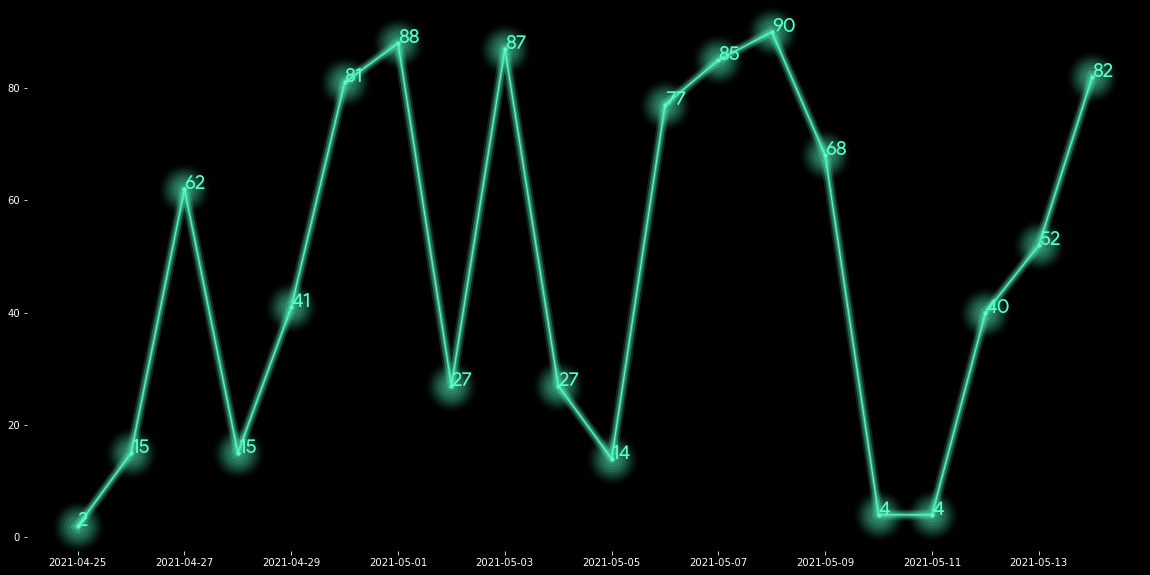

In [26]:
neona.lineplot(df.index, df[0], figsize= (20, 10), point_marker= 'o', point_size= 3, spines= False,
        font_dict= dict(fontfamily= "product sans", fontsize= 20), show_marks= True, show_values= True)

In this current version of Line plot, the text offsets are not being used. Because we need t ofigure out how to add when all data is not given. 

# 

#  KDE

In [294]:
from scipy.stats import gaussian_kde

def kdeplot(x, covariance_factor=.5, fill_alpha=.15, fill=True, spines=True, figsize=None, point_size=2,
             color="#59ffc5", lw=15):
    
    ax = plt.gca()
    fig = plt.gcf()
    if not ax: fig, ax = plot_configure(spines_yn= spines, figsize= figsize)
    a, b = get_lw(lw=lw)
    
    # Checking if X is from list, array, series or tuple (in short not df)
    if not isinstance(x, (pd.DataFrame)):
        density = gaussian_kde(x)
        x_min = min(x)
        x_max = max(x)
        xs = np.linspace(x_min - int(x_max * .5), x_max + int(x_max * .5), 2000)
        density.covariance_factor = lambda : covariance_factor
        density._compute_covariance()
        
        for width, alpha in zip(a, b):
            plt.plot(xs, density(xs), color=color, alpha= alpha, lw= width)
        plt.plot(xs, density(xs), color=color)
        
        if fill:
            ylim = plt.ylim()
            plt.fill_between(xs, density(xs), color=color, alpha=fill_alpha)
            plt.ylim(ylim)
        
    else:
        pass
    
    return ax

<AxesSubplot:>

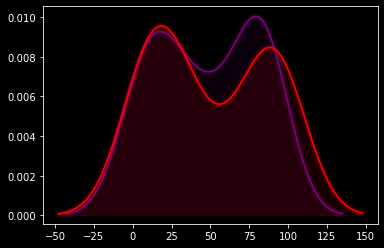

In [299]:
# plt.figure(figsize= (20, 10))
kdeplot(df[0], fill=True, fill_alpha=.1, spines=False, figsize= (20, 10), lw= 10, color= 'purple')
kdeplot(df[1], fill=True, fill_alpha=.1, spines=False, figsize= (20, 10), lw= 10, color= 'r')

The KDE and others are likely to be okay to work. Now you have to MAKE THE MINIMALISTIC plot_configure function and remove the functionality of figsize in the function call.

Bar plot is not working with DF. Please give a check.